In [1]:
import numpy as np
import pandas as pd

# 데이터 불러오고 정리

In [2]:
dataset = pd.read_csv("dataset.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.head(2)

,Unnamed: 0,YMD,year,month,day,24h,7days,elec,01March
0,1,day20100101,2010,1,1,0,5,56391.0,0
1,2,day20100101,2010,1,1,1,5,54439.0,0


In [5]:
dataset.drop('Unnamed: 0', axis =1, inplace = True)

In [6]:
dataset.head(3)

,YMD,year,month,day,24h,7days,elec,01March
0,day20100101,2010,1,1,0,5,56391.0,0
1,day20100101,2010,1,1,1,5,54439.0,0
2,day20100101,2010,1,1,2,5,52682.0,0


# 데이터 일자로 나누고 딕셔너리

In [7]:
def split(df):
    #create unique list of names
    UniqueDays = df.YMD.unique()

    #create a data frame dictionary to store your data frames
    DataFrameDict = {elem : pd.DataFrame for elem in UniqueDays}

    for key in DataFrameDict.keys():
        DataFrameDict[key] = df[:][df.YMD == key]
    return DataFrameDict

In [8]:
import time
start_time = time.time()

#work
dataset_dict= split(dataset)

print("--- %s seconds ---" % (time.time() - start_time))


--- 16.775919914245605 seconds ---


In [9]:
type(dataset_dict)

dict

In [10]:
dataset_dict_keys = list(dataset_dict.keys())

In [11]:
dataset_dict_values = list(dataset_dict.values())

In [12]:
dataset_dict_values[0]['elec'][9]

42471.0

In [13]:
dataset_dict[dataset_dict_keys[0]].elec.min()

42471.0

In [14]:
small = []
for i in range(len(dataset_dict)):
    small.append(dataset_dict[dataset_dict_keys[i]].elec.min())

In [15]:
#len(small)

In [16]:
#small

In [17]:
big = []
for i in range(len(dataset_dict)):
    big.append(dataset_dict[dataset_dict_keys[i]].elec.max())

In [18]:
#big

In [19]:
#len(big)

In [20]:
vol = []
for i in range(len(dataset_dict)):
    vol.append(dataset_dict[dataset_dict_keys[i]].elec.sum())

In [21]:
#vol

In [22]:
#len(vol)

In [23]:
avg = []
for i in range(len(dataset_dict)):
    avg.append(dataset_dict[dataset_dict_keys[i]].elec.mean())

In [24]:
#avg

In [25]:
#len(avg)

In [26]:
#시간! 아침
nine_a = []
for i in range(len(dataset_dict)):
    e_ = np.asarray(dataset_dict[dataset_dict_keys[i]].elec)
    nine_a.append(e_[9])

In [27]:
#nine_a

In [28]:
#시간! 저녁
nine_p = []
for i in range(len(dataset_dict)):
    e_ = np.asarray(dataset_dict[dataset_dict_keys[i]].elec)
    nine_p.append(e_[21])

In [29]:
#nine_p

In [30]:
#len(nine_a)

In [31]:
#len(nine_p)

In [32]:
days = []
for i in range(len(dataset_dict)):
    days.append(dataset_dict[dataset_dict_keys[i]])

In [33]:
days = list(dataset_dict.keys())

In [34]:
len(days)

3026

In [35]:
# Date, Open, High, Low, Close, Vol
engineered = pd.DataFrame(
    {'Date': days,
     '9AM': nine_a,
     #'High': big,
     'Low': small,
     '9PM': nine_p,
     'Vol': vol
     ,'High': big,
    })

In [36]:
engineered.head()

,Date,9AM,Low,9PM,Vol,High
0,day20100101,42471.0,42471.0,49165.0,1148000.0,56391.0
1,day20100102,46746.0,46405.0,50361.0,1178586.0,55470.0
2,day20100103,45633.0,45633.0,51897.0,1189365.0,55581.0
3,day20100104,61957.0,49573.0,58076.0,1406452.0,66149.0
4,day20100105,64867.0,54680.0,60542.0,1479917.0,66901.0


In [37]:
engineered.to_csv("engineered_dataset.csv")

In [38]:
engineered.shape

(3026, 6)

# 모델 들어갑니다!

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [40]:
engineered.columns

Index(['Date', '9AM', 'Low', '9PM', 'Vol', 'High'], dtype='object')

In [41]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['9AM'] = min_max_scaler.fit_transform(df['9AM'].values.reshape(-1,1))
    #df['High'] = min_max_scaler.fit_transform(df['High'].values.reshape(-1,1))
    #df['Low'] = min_max_scaler.fit_transform(df['Low'].values.reshape(-1,1))
    df['9PM'] = min_max_scaler.fit_transform(df['9PM'].values.reshape(-1,1))
    df['Vol'] = min_max_scaler.fit_transform(df['Vol'].values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df['Low'].values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df['High'].values.reshape(-1,1))
    return df


In [42]:
df = engineered.copy()
df.set_index('Date', inplace = True)

In [43]:
df = normalize_data(df)
df.head()

,9AM,Low,9PM,Vol,High
Date,,,,,
day20100101,0.157306,0.273012,0.279929,0.283061,0.350765
day20100102,0.234933,0.377306,0.310681,0.311576,0.332438
day20100103,0.214723,0.356840,0.350175,0.321626,0.334647
day20100104,0.511140,0.461294,0.509051,0.524017,0.544943
day20100105,0.563981,0.596686,0.572457,0.592508,0.559907


In [44]:
df.shape

(3026, 5)

In [45]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [46]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model



In [47]:
window = 22
X_train, y_train, X_test, y_test = load_data(df, window)
print (X_train[0], y_train[0])

[[0.15730602 0.27301166 0.27992903 0.28306109 0.35076513]
 [0.23493309 0.37730647 0.31068086 0.3115765  0.33243786]
 [0.21472281 0.35683987 0.35017484 0.32162579 0.33464669]
 [0.51114016 0.46129374 0.5090507  0.52401658 0.54494259]
 [0.56398104 0.59668611 0.57245706 0.5925082  0.55990687]
 [0.59074649 0.64347826 0.5904042  0.6191357  0.58266173]
 [0.60360262 0.66304348 0.60549727 0.63162716 0.59058166]
 [0.60425632 0.67550371 0.58770441 0.62606364 0.59282033]
 [0.46474551 0.62433722 0.44854983 0.51149576 0.44799315]
 [0.26770896 0.43419936 0.39113442 0.38185347 0.38079319]
 [0.59138203 0.5092789  0.58207343 0.58369142 0.58917876]
 [0.61144704 0.6371421  0.60629435 0.62716889 0.59951645]
 [0.62243286 0.67293213 0.62444719 0.64910566 0.60999853]
 [0.62101651 0.69554613 0.61349378 0.64982831 0.60841775]
 [0.60928619 0.67486744 0.57826802 0.62300755 0.59250194]
 [0.47013855 0.63067338 0.46035174 0.5103425  0.44399339]
 [0.26778159 0.4195122  0.38678906 0.38066106 0.38556902]
 [0.58195784 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
model = build_model([5,window,1])

Compilation Time :  0.026868820190429688


In [49]:
#import time
start_time = time.time()

#work

model.fit(X_train,y_train,batch_size=512,epochs=45,validation_split=0.1,verbose=1)
print("--- %s seconds ---" % (time.time() - start_time))

Train on 2432 samples, validate on 271 samples
Epoch 1/45
2432/2432 [==============================] - 7s 3ms/step - loss: 0.2315 - acc: 4.1118e-04 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 2/45
2432/2432 [==============================] - 5s 2ms/step - loss: 0.0476 - acc: 0.0000e+00 - val_loss: 0.0218 - val_acc: 0.0000e+00
Epoch 3/45
2432/2432 [==============================] - 5s 2ms/step - loss: 0.0265 - acc: 4.1118e-04 - val_loss: 0.0531 - val_acc: 0.0000e+00
Epoch 4/45
2432/2432 [==============================] - 5s 2ms/step - loss: 0.0280 - acc: 4.1118e-04 - val_loss: 0.0266 - val_acc: 0.0000e+00
Epoch 5/45
2432/2432 [==============================] - 6s 2ms/step - loss: 0.0237 - acc: 4.1118e-04 - val_loss: 0.0222 - val_acc: 0.0000e+00
Epoch 6/45
2432/2432 [==============================] - 5s 2ms/step - loss: 0.0227 - acc: 0.0000e+00 - val_loss: 0.0309 - val_acc: 0.0000e+00
Epoch 7/45
2432/2432 [==============================] - 6s 2ms/step - loss: 0.0229 - acc: 4.1118e-04 

In [50]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 

(300, 1)


In [51]:
df.head(3)

,9AM,Low,9PM,Vol,High
Date,,,,,
day20100101,0.157306,0.273012,0.279929,0.283061,0.350765
day20100102,0.234933,0.377306,0.310681,0.311576,0.332438
day20100103,0.214723,0.356840,0.350175,0.321626,0.334647


In [52]:
df['avg'] = avg

In [53]:
#df = pd.read_csv("../input/prices-split-adjusted.csv", index_col = 0)
#df["adj close"] = df.close # Moving close to the last column
#df.drop(['close'], 1, inplace=True) # Moving close to the last column

#df.drop(['symbol'],1,inplace=True)

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['High'].values.reshape(-1,1)
    #df = avg.values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [58]:
len(newp)

300

In [56]:
newp

array([[0.51219714],
       [0.5117347 ],
       [0.5173256 ],
       [0.5190494 ],
       [0.5236463 ],
       [0.5302064 ],
       [0.53897125],
       [0.5435497 ],
       [0.5456893 ],
       [0.5536174 ],
       [0.5582606 ],
       [0.56639063],
       [0.5732759 ],
       [0.58146715],
       [0.584801  ],
       [0.58724326],
       [0.59613335],
       [0.6015777 ],
       [0.608021  ],
       [0.61559284],
       [0.62241894],
       [0.62437814],
       [0.6249923 ],
       [0.63193774],
       [0.63546556],
       [0.64014435],
       [0.64550304],
       [0.65138704],
       [0.65088373],
       [0.6495809 ],
       [0.6552246 ],
       [0.65812236],
       [0.66213125],
       [0.66722834],
       [0.6727678 ],
       [0.67310077],
       [0.67095727],
       [0.6757104 ],
       [0.6780489 ],
       [0.67874247],
       [0.67889524],
       [0.6789687 ],
       [0.6737841 ],
       [0.6683898 ],
       [0.66631144],
       [0.6633147 ],
       [0.66122115],
       [0.659

In [57]:
newy_test

array([[0.37850477],
       [0.67265978],
       [0.700396  ],
       [0.68939168],
       [0.68928655],
       [0.72260363],
       [0.48816986],
       [0.38640479],
       [0.68497403],
       [0.68787678],
       [0.71409629],
       [0.72348834],
       [0.72928979],
       [0.51485483],
       [0.46043022],
       [0.76188486],
       [0.79066177],
       [0.79059957],
       [0.83421881],
       [0.79350487],
       [0.58549738],
       [0.5101387 ],
       [0.7895449 ],
       [0.81429964],
       [0.84872979],
       [0.85698366],
       [0.90100565],
       [0.61226195],
       [0.52844606],
       [0.84336987],
       [0.83258804],
       [0.87393787],
       [0.92772075],
       [0.94907016],
       [0.7291903 ],
       [0.58812409],
       [0.88558814],
       [0.88669944],
       [0.83304519],
       [0.80425049],
       [0.79474002],
       [0.54623605],
       [0.50160189],
       [0.6171221 ],
       [0.66085607],
       [0.68332239],
       [0.70993246],
       [0.771

In [54]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.01327 MSE (0.12 RMSE)
Test Score: 0.02547 MSE (0.16 RMSE)


(0.01327340087474021, 0.025470010122905173)

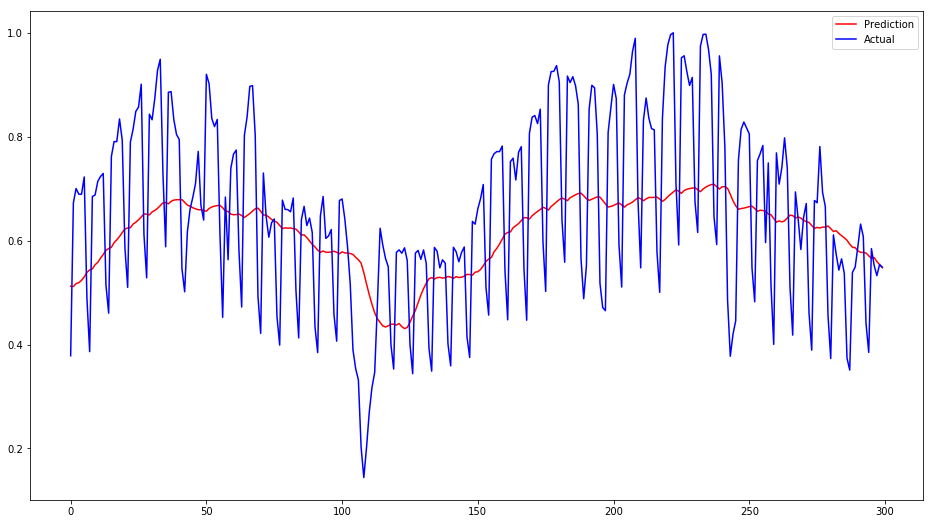

In [55]:
import matplotlib.pyplot as plt2

plt2.figure(figsize = (16,9))
plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()